# SEN122A Statistical Analysis of Choice Behaviour

## `Session Lab 01B:`
## `Introduction to choice behaviour analysis`

**Delft University of Technology**<br>
**Q2 2024**<br>
**Instructor:** Sander van Cranenburgh<br>
**TA:**  Gabriel Nova <br>

### `Instructions`

**Lab sessions aim to:**<br>
* Illustrate how models and theory discussed in the classroom work out in practice.
* Help you gather hands-on modelling and data analysis skills.


**Lab sessions are:**<br>
* Learning environments where you work with Python and get support from TA and fellow students.
* Not graded and do not have to be submitted.
* A good preparation for the graded partial exam.

### `Application: Modelling neighbourhood choices`

In this lab session, we will analyse neighbourhood location choice behaviour. Understanding people's preferences over neighbourhood characteristics is crucial for city planners when they (re)develop neighbourhoods or devise policies to tackle e.g. residential segregation. During this lab session, you will apply discrete choice models to uncover people's preferences over attributes, such as the distance to the city centre and the share of foreigners in their neighbourhood. Also, you will explore whether preferences interact with covariates such as age, gender, home ownership, car ownership and urbanisation level. While doing so, you will test various utility specifications and interpret the modelling outcomes of discrete choice models.

For this study, we use data from a Stated Choice (SC) experiment, which was conducted between 2017 and 2018 in four European cities: Hanover, Mainz, Bern, and Zurich.

![SC](./data/sc_experiment.png)

**`Learning objectives lab session 01`**

After completing the following lab session, you will be able to:
* Interpret the statitical significance ofdiscrete choice model estimates
* Test alternative utility specification with interactions and nonlinearities


**`This lab consists of 2 parts and has 2 exercises`**

**Part 1**: Interactions with socio-demographic variables and nonlinear utilities
- Exerise 1: "Modelling interactions with socio-demographic variables"
- Exerise 2: "Nonlinear utility specifcations"

**Part 2**: Understanding the impact of the sample size on the standard errors of the estimates
- Excerise 3: "Impact of sample size on standard errors"

#### `Import packages`

To begin, we will import all the Python libraries that we will use in this lab session.

In [397]:
# Biogeme
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta, Variable, log, exp

# General python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path

# Pandas setting to show all columns when displaying a pandas dataframe
pd.set_option('display.max_columns', None)

## Part 1: Interactions with socio-demographic variables and nonlinear utilities
In this part, we will: 
1. Load the data. 
1. Estimate the basic linear-additive RUM-MNL model. This model serves as the benchmark.
1. Explore how tastes vary across socio-demographic groups, using interaction terms. Specifically, we will test whether males and females have different of the tasted for the share of foreigners in the neighbourhood.
1. Assess the validity of the the linearity assumption of the utility function by testing a non-linear utility specification.

### `1. Load the data set` <br>

**`Load the data set`** <br>

In [398]:
# Load the data as a pandas dataframe
data_path =  Path(f'data/choice_data_cleaned.dat')
df = pd.read_csv(data_path, sep='\t')

### `2. The linear-additive RUM-MNL model` <br>

**`Biogeme database`**<br>
To use biogeme, we first need to create the data set as a Biogeme database object using `db.Database()`. This object contains the data in a format compatible with the library functions for model estimation in Biogeme.

In [399]:
# db.Database takes as arguments (1) a name (string) and (2) a data set (pandas dataframe)
biodata = db.Database('Neighboorhood_choice_data', df)

**`Estimation function`** 

To estimate the MNL models, we use the function `estimate_mnl()` that we created in Lab 1.<br>
This time we directly import the function from the file `estimation_functions.py` and use it to estimate the MNL model.<br>
<br>
It takes the following inputs:<br>
* Systematic utilities function (**V1, V2, V3**)
* Chosen alternatives array (**CHOICE**)
* Database which contains the relevant attributes and characteristics (**database**)
* Model name (**"string"**)

In [400]:
# Import the estimation function
from estimation_functions import estimate_mnl
# To use it, we invoke result = estimate_mnl(V1,V2,V3,CHOICE,database,name)

**`Biogeme variables`**<br>

Also, we need to create Biogeme objects for all the variables in our data set that we want to use in our model specifications.<br>
The `Variable()` function creates an object that represents the variable values and will allow it to be included in the model estimation function.

In [401]:
# We create Variable objects for each of the variables in the data set that we want to use in the model

# Attributes of alternative 1
STORES1     = Variable('STORES1')
TRANSPORT1  = Variable('TRANSPORT1')
CITY1       = Variable('CITY1')
NOISE1      = Variable('NOISE1')
GREEN1      = Variable('GREEN1')
FOREIGN1    = Variable('FOREIGN1')

# Attributes of alternative 2    
STORES2     = Variable('STORES2')
TRANSPORT2  = Variable('TRANSPORT2')
CITY2       = Variable('CITY2')
NOISE2      = Variable('NOISE2')
GREEN2      = Variable('GREEN2')
FOREIGN2    = Variable('FOREIGN2')
    
# Attributes of alternative 3
STORES3     = Variable('STORES3')
TRANSPORT3  = Variable('TRANSPORT3')
CITY3       = Variable('CITY3')
NOISE3      = Variable('NOISE3')
GREEN3      = Variable('GREEN3')
FOREIGN3    = Variable('FOREIGN3')

# The choice
CHOICE      = Variable('CHOICE')

# Socio-economic variables
AGE         = Variable('AGE')
WOMAN       = Variable('WOMAN')
HOMEOWNER   = Variable('HOMEOWNER')
CAROWNER    = Variable('CAROWNER')
RESPCITY    = Variable('RESPCITY')
JOB         = Variable('JOB')

**`The linear-additive utility specification`**

The cell below creates the utility functions for a linear-additive RUM model in Biogeme.

In [402]:
# Give a name to the model    
model_name = 'Linear-additive RUM-MNL'

# Define the model parameters, using the function "Beta()", in which you must define:
# the name of the parameter,
# starting value, 
# lower bound,
# upper bound, 
# 0 or 1, indicating if the parameter must be estimated. 0 means estimated, 1 means fixed to the starting value. 
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0)

# Define the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

**`Estimation of the linear-additive RUM-MNL model`**

We pass the model specifications and the database to the estimation function, which returns an object which contains the estimation results.

In [403]:
# Estimate the model
results_MNL = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)

In [404]:
# Print the estimation statistics
print(results_MNL.short_summary())

# Get the model parameters in a pandas table and  print it
beta_hat_MNL = results_MNL.get_estimated_parameters()
print(beta_hat_MNL)

# Store the LL of the MNL model for later use
LL_MNL = results_MNL.data.logLike

Results for model Linear-additive RUM-MNL
Nbr of parameters:		6
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8403.772
Likelihood ratio test (null):		3969.412
Rho square (null):			0.191
Rho bar square (null):			0.19
Akaike Information Criterion:	16819.54
Bayesian Information Criterion:	16862.47

                Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.167571      0.008076   -20.749441           0.0
B_foreign   -1.177581      0.109050   -10.798570           0.0
B_green      0.415726      0.011397    36.476251           0.0
B_noise     -0.438061      0.010593   -41.352803           0.0
B_stores    -0.034551      0.002587   -13.354178           0.0
B_transport -0.074348      0.002486   -29.911007           0.0


### `3. Interactions with socio-demographic variables` <br>

Preferences and tastes may vary across socio-demographic segments of the population. By interacting socio-demographic variables with the other attributes, we can obtain insights into how preferences vary across socio-demographic groups.<br>

For example, we can include the variable `WOMAN` as an interaction with one of the attributes, e.g. `FOREIGN`. This allows us to analyse whether there is a difference between males and females in terms of their taste over this attribute. <br>

To specify a model with interactions, we create separate taste parameters for `WOMAN` and for `MAN`, to interact with the attribute `FOREIGN`: <br>

    B_foreign_woman = Beta('B_foreign_woman'  , 0, None, None, 0)
    B_foreign_man   = Beta('B_foreign_man'    , 0, None, None, 0)

    V1 =  ... + (B_foreign_man * (WOMAN == 0) + B_woman_foreign_woman * (WOMAN == 1)) * FOREIGN1

The logical statements (WOMAN == 0) and (WOMAN == 1) are used to create a dummy variable that takes the value 1 if the condition is met and 0 otherwise. This allows us to estimate the gender-specific taste parameters for B_foreign.

In [405]:
# Give a name to the model   
model_name = 'Linear-additive RUM-MNL with interaction term'

B_stores        = Beta('B_stores'       , 0, None, None, 0)
B_transport     = Beta('B_transport'    , 0, None, None, 0)
B_city          = Beta('B_city'         , 0, None, None, 0)
B_noise         = Beta('B_noise'        , 0, None, None, 0)
B_green         = Beta('B_green'        , 0, None, None, 0)
B_foreign_man   = Beta('B_foreign_man'  , 0, None, None, 0)
B_foreign_woman = Beta('B_foreign_woman', 0, None, None, 0)

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + (B_foreign_man*(WOMAN==0) + B_foreign_woman*(WOMAN==1)) * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + (B_foreign_man*(WOMAN==0) + B_foreign_woman*(WOMAN==1)) * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + (B_foreign_man*(WOMAN==0) + B_foreign_woman*(WOMAN==1)) * FOREIGN3

# Estimate the model using the estimate_mnl function created before
results_interaction = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)

# Print the estimation statistics
print(results_interaction.short_summary())

# Get the model parameters in a pandas table and then print it
beta_hat_interaction = results_interaction.get_estimated_parameters()
print(beta_hat_interaction)


Results for model Linear-additive RUM-MNL with interaction term
Nbr of parameters:		7
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8399.519
Likelihood ratio test (null):		3977.917
Rho square (null):			0.191
Rho bar square (null):			0.191
Akaike Information Criterion:	16813.04
Bayesian Information Criterion:	16863.12

                    Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city          -0.167538      0.008077   -20.742906  0.000000e+00
B_foreign_man   -1.522909      0.163102    -9.337181  0.000000e+00
B_foreign_woman -0.876878      0.146795    -5.973478  2.322477e-09
B_green          0.415810      0.011399    36.479316  0.000000e+00
B_noise         -0.438447      0.010595   -41.380782  0.000000e+00
B_stores        -0.034471      0.002587   -13.325366  0.000000e+00
B_transport     -0.074408      0.002486   -29.932191  0.000000e+00


**Interpretation:**<br>
The coefficient `B_foreign` represents the marginal utility of the percentage of foreigners in a neighbourhood. Since the estimated coefficient is negative, it means that an increase in the percentage of foreigners in a neighbourhood makes it less attractive.  In this model, we have interacted `gender` with the attribute `FOREIGN`. The parameters `B_foreign_woman` and `B_foreign_man` show that man and woman have different tastes over this attribute. Since the estimated coefficient is much smaller for woman than fro man, it indicates that woman place less value on the share of foreigners in a neighbourhood than men. 

### `Excersice 1: Modelling interactions with socio-demographic variables`

Investigate whether inhabitants of different cities also have different tastes over the share of foreigners. To investigate this, you need to estimate another MNL model in which you interact the variable `RESPECITY` with `FOREIGN`. Note that RESPCITY has 4 categorical levels.

Interpret your results. <br>

`A` Do you find evidence of taste heterogeneity? I.e. do inhabitants of different cities have different tastes over the share of foreigners?<br>

`B` Use the LRS to determine whether the model with interactions outperforms the linear-additive RUM-MNL model without interactions.

In [406]:
# Your code and answers
# Give a name to the model   
model_name = 'Linear-additive RUM-MNL with RESPECITY'

B_stores        = Beta('B_stores'       , 0, None, None, 0)
B_transport     = Beta('B_transport'    , 0, None, None, 0)
B_city          = Beta('B_city'         , 0, None, None, 0)
B_noise         = Beta('B_noise'        , 0, None, None, 0)
B_green         = Beta('B_green'        , 0, None, None, 0)
# B_foreign_man   = Beta('B_foreign_man'  , 0, None, None, 0)
# B_foreign_woman = Beta('B_foreign_woman', 0, None, None, 0)
B_foreign_resp1 = Beta('B_foreign_resp1', 0, None, None, 0)
B_foreign_resp2 = Beta('B_foreign_resp2', 0, None, None, 0)
B_foreign_resp3 = Beta('B_foreign_resp3', 0, None, None, 0)
B_foreign_resp4 = Beta('B_foreign_resp4', 0, None, None, 0)

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + (B_foreign_resp1*(RESPCITY==1) + B_foreign_resp2*(RESPCITY==2) + B_foreign_resp3*(RESPCITY==3)+ B_foreign_resp4*(RESPCITY==4))* FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + (B_foreign_resp1*(RESPCITY==1) + B_foreign_resp2*(RESPCITY==2) + B_foreign_resp3*(RESPCITY==3)+ B_foreign_resp4*(RESPCITY==4))* FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + (B_foreign_resp1*(RESPCITY==1) + B_foreign_resp2*(RESPCITY==2) + B_foreign_resp3*(RESPCITY==3)+ B_foreign_resp4*(RESPCITY==4))* FOREIGN3

# Estimate the model using the estimate_mnl function created before
results_interaction_resp = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)

# Print the estimation statistics
print(results_interaction_resp.short_summary())

# Get the model parameters in a pandas table and then print it
beta_hat_interaction = results_interaction_resp.get_estimated_parameters()
print(beta_hat_interaction)

Results for model Linear-additive RUM-MNL with RESPECITY
Nbr of parameters:		9
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8376.42
Likelihood ratio test (null):		4024.115
Rho square (null):			0.194
Rho bar square (null):			0.193
Akaike Information Criterion:	16770.84
Bayesian Information Criterion:	16835.23

                    Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city          -0.168761      0.008093   -20.852770  0.000000e+00
B_foreign_resp1 -1.808540      0.229434    -7.882621  3.108624e-15
B_foreign_resp2 -2.553211      0.268918    -9.494386  0.000000e+00
B_foreign_resp3 -0.532259      0.185475    -2.869715  4.108415e-03
B_foreign_resp4 -0.521514      0.213315    -2.444802  1.449316e-02
B_green          0.417830      0.011433    36.547463  0.000000e+00
B_noise         -0.439319      0.010652   -41.242310  0.000000e+00
B_stores        -0.034918      0.002592   -13.470564  0.000000e+00
B_transport     -0.074586      0.002

In [407]:
LL_MNL = results_MNL.data.logLike
nLL_MNL = results_MNL.data.nullLogLike

LL_RESP = results_interaction_resp.data.logLike
nLL_RESP = results_interaction_resp.data.nullLogLike


print(f"{-2*(LL_RESP - LL_MNL)}")

-54.70304866383594


A. There is indeed a taste heterogenity. All betas record negative sentiment but there is significant difference between each respcity. //
B. DoF: 3, alhpa = 0.05 ---> 7.38. Yes the RUM_MNL far outperforms the standard MNL.

### `4. Nonlinear utility specifications`

Until now, we have assumed in our utility specification that utility is linear (and additive). This means that the change in utility caused by a unit change in the attribute level is independent of attribute's base level. We are to going assess the validity of this assumption by testing the alternative hypothesis, i.e. utility is nonlinear.<br>

More specifically, we test the assumption that the utility derived from distance to the grocery store (`STORES`) takes a logarithmic form:

$ V_{i} = \beta_{STORES}\ln(STORESi) + ...$

Because the logarithm is a globally concave function, this assumption implies that the disutility of e.g. a 10-minutes trip is less than the disutility of two trips of 5 minutes. The plot below illustrates this assumption.

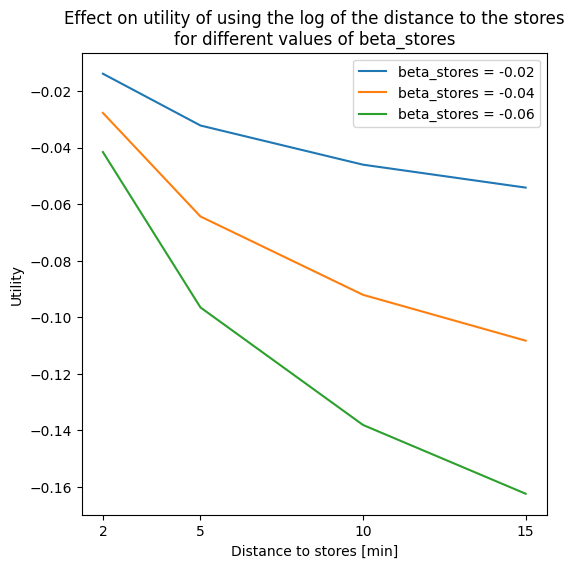

In [408]:
# Illustrate the effect of the log of distance to the stores on the utility
fig, ax = plt.subplots(figsize=(6, 6))
beta_stores = [-0.02, -0.04, -0.06]
for beta in beta_stores:
    x = np.sort(df['STORES1'].unique())
    V = beta*np.log(x)
    ax.plot(x, V, label=f'beta_stores = {beta}')
ax.set_xlabel('Distance to stores [min]')
ax.set_xticks(x)
ax.set_ylabel('Utility')
ax.legend()
ax.set_title('Effect on utility of using the log of the distance to the stores\nfor different values of beta_stores')
plt.show()

In [409]:
# Give a name to the model  
model_name = 'MNL with non-linearities'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 

# Definition of the utility functions
V1 = B_stores * log(STORES1) + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * log(STORES2) + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * log(STORES3) + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

# Estimate
results_nonlin = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)   

# Print the estimation statistics
print(results_nonlin.short_summary())

# Get the model parameters in a pandas table and then print it
beta_hat_nonlin = results_nonlin.get_estimated_parameters()
print(beta_hat_nonlin)

Results for model MNL with non-linearities
Nbr of parameters:		6
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8423.767
Likelihood ratio test (null):		3929.421
Rho square (null):			0.189
Rho bar square (null):			0.189
Akaike Information Criterion:	16859.53
Bayesian Information Criterion:	16902.46

                Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.165454      0.008114   -20.391927           0.0
B_foreign   -1.151919      0.108219   -10.644337           0.0
B_green      0.415660      0.011428    36.371321           0.0
B_noise     -0.436410      0.010622   -41.087387           0.0
B_stores    -0.194316      0.016162   -12.023363           0.0
B_transport -0.073419      0.002477   -29.644788           0.0


**Interpretation:**<br>
The results clearly show that the model fit (i.e. the Final LL) deteriorated because of the nonlinearity assumption. Hence, we keep our assumption that utility is linear with the distance to `STORES`.

### `Exercise 2: Nonlinear utility specifications`

Now, let's turn our attention to the attribute `NOISE`. With noise, we expect the opposite effect of diminishing marginal utility. That is, the utility derived from "high" traffic noise (level 4) is probably much worse than that of two times "little" traffic noise (level 2). To investigate this, you need to estimate two nonlinear models, in which you try:

(1) $ V_i = ... + \beta_{noise} \cdot exp(NOISE) + ... $

(2) $ V_i = ... + \beta_{noise} \cdot NOISE + \beta_{noise^2} \cdot NOISE^2 + ...   $

Interpret your results. <br>

`A` Do you find evidence of nonlinear utility? <br>

`B` Which of the two models is statistically the best model?

In [410]:
# Your code and answers
# Give a name to the model  
model_name = 'MNL_noise with multiple cat'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * exp(NOISE1) + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * exp(NOISE2) + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * exp(NOISE3) + B_green * GREEN3 + B_foreign * FOREIGN3

# Estimate
results_noise_exp = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)   

# Print the estimation statistics
print(results_nonlin.short_summary())

# Get the model parameters in a pandas table and then print it
beta_hat_nonlin = results_nonlin.get_estimated_parameters()
print(beta_hat_nonlin)


Results for model MNL with non-linearities
Nbr of parameters:		6
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8423.767
Likelihood ratio test (null):		3929.421
Rho square (null):			0.189
Rho bar square (null):			0.189
Akaike Information Criterion:	16859.53
Bayesian Information Criterion:	16902.46

                Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.165454      0.008114   -20.391927           0.0
B_foreign   -1.151919      0.108219   -10.644337           0.0
B_green      0.415660      0.011428    36.371321           0.0
B_noise     -0.436410      0.010622   -41.087387           0.0
B_stores    -0.194316      0.016162   -12.023363           0.0
B_transport -0.073419      0.002477   -29.644788           0.0


In [411]:
# Your code and answers
# Give a name to the model  
model_name = 'MNL_noise with multiple cat'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_noise2    = Beta('B_noise2'   , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1**2 + B_noise2 * NOISE1**2 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2**2 + B_noise2 * NOISE2**2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3**2 + B_noise2 * NOISE3**2 + B_green * GREEN3 + B_foreign * FOREIGN3

# Estimate
results_noise_cat = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)   

# Print the estimation statistics
print(results_nonlin.short_summary())

# Get the model parameters in a pandas table and then print it
beta_hat_nonlin = results_nonlin.get_estimated_parameters()
print(beta_hat_nonlin)


Results for model MNL with non-linearities
Nbr of parameters:		6
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8423.767
Likelihood ratio test (null):		3929.421
Rho square (null):			0.189
Rho bar square (null):			0.189
Akaike Information Criterion:	16859.53
Bayesian Information Criterion:	16902.46

                Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.165454      0.008114   -20.391927           0.0
B_foreign   -1.151919      0.108219   -10.644337           0.0
B_green      0.415660      0.011428    36.371321           0.0
B_noise     -0.436410      0.010622   -41.087387           0.0
B_stores    -0.194316      0.016162   -12.023363           0.0
B_transport -0.073419      0.002477   -29.644788           0.0


In [412]:
print(results_MNL.data.logLike, results_noise_exp.data.logLike, results_noise_cat.data.logLike)


-8403.77188628228 -8088.62082969984 -8238.76212466263


A. Utility for both exponential data and categorical data improve the model

B. Results off the exponential solution outperform the results of the multiple beta squared (bigger difference between final log likelihood and null log likelihood estimation). //
Mention model fit and LRS: the lower the final log likelihood, the better the model fit. Also always check for LRS.

### `Categorical treatment of variables` <br>
Alternatively, we can treat the attribute `NOISE` as a categorical variable. This allows us to estimate separate taste parameters for each level of the attribute. This is useful when we do not have a clear idea of the functional form of the utility function.

In [413]:
# Give a name to the model  
model_name = 'MNL with categorical NOISE'

# Parameters to be estimated
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0) 
B_noise_cat1    = Beta('B_noise_cat1'    , 0, None, None, 1)   
B_noise_cat2    = Beta('B_noise_cat2'    , 0, None, None, 0)   
B_noise_cat3    = Beta('B_noise_cat3'    , 0, None, None, 0)   
B_noise_cat4    = Beta('B_noise_cat4'    , 0, None, None, 0)   

# Definition of the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise_cat1 * (NOISE1==1) + B_noise_cat2 * (NOISE1==2) + B_noise_cat3 * (NOISE1==3) + B_noise_cat4 * (NOISE1==4) + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise_cat1 * (NOISE2==1) + B_noise_cat2 * (NOISE2==2) + B_noise_cat3 * (NOISE2==3) + B_noise_cat4 * (NOISE2==4) + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise_cat1 * (NOISE3==1) + B_noise_cat2 * (NOISE3==2) + B_noise_cat3 * (NOISE3==3) + B_noise_cat4 * (NOISE3==4) + B_green * GREEN3 + B_foreign * FOREIGN3

# Estimate
results_cat = estimate_mnl(V1,V2,V3,CHOICE,biodata,model_name)   

# Print the estimation statistics
print(results_cat.short_summary())

# Get the model parameters in a pandas table and print it
beta_hat_cat = results_cat.get_estimated_parameters()
print(beta_hat_cat)

Results for model MNL with categorical NOISE
Nbr of parameters:		8
Sample size:			9456
Excluded data:			0
Null log likelihood:		-10388.48
Final log likelihood:		-8044.279
Likelihood ratio test (null):		4688.397
Rho square (null):			0.226
Rho bar square (null):			0.225
Akaike Information Criterion:	16104.56
Bayesian Information Criterion:	16161.79

                 Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city       -0.181765      0.008148   -22.307875      0.000000
B_foreign    -1.271681      0.113783   -11.176367      0.000000
B_green       0.409461      0.011872    34.490001      0.000000
B_noise_cat2  0.044092      0.031186     1.413845      0.157407
B_noise_cat3 -0.296303      0.031893    -9.290445      0.000000
B_noise_cat4 -1.692892      0.044835   -37.758546      0.000000
B_stores     -0.038647      0.002661   -14.524872      0.000000
B_transport  -0.073284      0.002623   -27.939563      0.000000


**Interpretation:**<br>
The results show that the model fit is even better when treating `NOISE` as a categorical variable than using the squared term. We can conduct an LRS to determine whether the model with the categorical treatment of `NOISE` outperforms the model with the squared term.
The categorical model consumes 1 extra parameter, but the model fit improvement (-8044.28 vs. -8064.78) far exceeding the critical LRS.

 beta_noise = [ 0.          0.0440922  -0.29630263 -1.69289198]


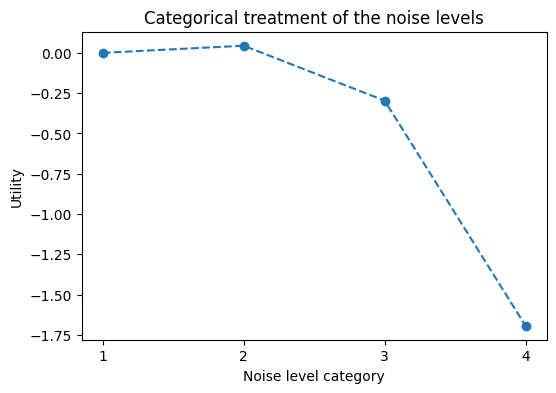

In [414]:
# Illustrate the effect of noise levels the utility
fig, ax = plt.subplots(figsize=(6, 4))

# Add B_noise_cat1 = 0 to the beta_hat_cat
beta_hat_cat.loc['B_noise_cat1', 'Value']  = 0
beta_noise = beta_hat_cat.loc[['B_noise_cat1','B_noise_cat2','B_noise_cat3','B_noise_cat4'],'Value'].values
print(f' beta_noise = {beta_noise}')

# Plot the effect of the noise levels on utility
x = np.sort(df['NOISE1'].unique())
V = beta_noise

ax.plot(x, V,'o--')
ax.set_xlabel('Noise level category')
ax.set_xticks(x)
ax.set_ylabel('Utility')
ax.set_title('Categorical treatment of the noise levels')
plt.show()

**Interpretation:**<br>
* The plot shows that people are indifferent to noise levels 1 and 2. However, they have a strong preference for (avoiding) higher noise levels. People derive especially a big disutility from noise level 4.
* The line is dashed because the model treats `NOISE` as a categorical variable. This means that between the point a linear interpolation is made.  But this is just an assumption. We do not know the exact shape of the utility function.

## Part 2: Understanding the impact of the sample size on the <br> standard errors of the estimates

The more data observations we have, the more **precise** our estimates will be. In this part, we will investigate how the sample size affects the **standard errors** of the estimates. We will do this by estimating the linear-additive RUM-MNL model with different sample sizes and inspect how the magnitudes of standard errors of the estimates decrease with increasing sample size.

In [415]:
# Define the fractions to sample
frac = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create a pandas dataframe to store the results
df_std_err_frac = pd.DataFrame(index=beta_hat_MNL.index, columns=frac)

# Loop over the fractions
for fraction in frac:
    
    # Randomly sample frac% of the data
    df_frac = df.sample(frac=fraction, random_state=42)  # Using random_state for reproducibility

    # Create a new Biogeme database with the sampled data
    biodata_frac = db.Database('Neighbourhood_choice_data_sampled', df_frac)


    # Give a name to the model    
    model_name = f'Linear-additive RUM-MNL with {fraction*100}% of the data'

    # Redefine the utility functions
    V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
    V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
    V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

    # Estimate the model
    results_MNL_frac = estimate_mnl(V1,V2,V3,CHOICE,biodata_frac,model_name)

    # Get the model parameters in a pandas table and  print it
    beta_hat_MNL_frac   = results_MNL_frac.get_estimated_parameters()
    df_std_err_frac.loc[:,fraction] = beta_hat_MNL_frac['Rob. Std err']
    
# Show the results
df_std_err_frac

0.1       0.2       0.3       0.4       0.5       0.6  \
B_city       0.025659  0.017825  0.014687  0.012712  0.011388  0.010438   
B_foreign    0.344377  0.243275  0.201172  0.172397  0.154735  0.141234   
B_green      0.036943  0.025366  0.020631  0.017811   0.01613  0.014711   
B_noise      0.034991  0.023641  0.019207  0.016411  0.014791  0.013531   
B_stores     0.008388  0.005708  0.004677  0.004058  0.003647  0.003345   
B_transport  0.007771  0.005475  0.004429  0.003866  0.003477  0.003191   

                  0.7       0.8       0.9       1.0  
B_city       0.009657  0.009049  0.008535  0.008076  
B_foreign     0.13014  0.121684  0.115095  0.109049  
B_green      0.013532  0.012698  0.012008  0.011397  
B_noise      0.012527  0.011753  0.011094  0.010593  
B_stores     0.003099  0.002895  0.002726  0.002587  
B_transport  0.002969  0.002783  0.002624  0.002486

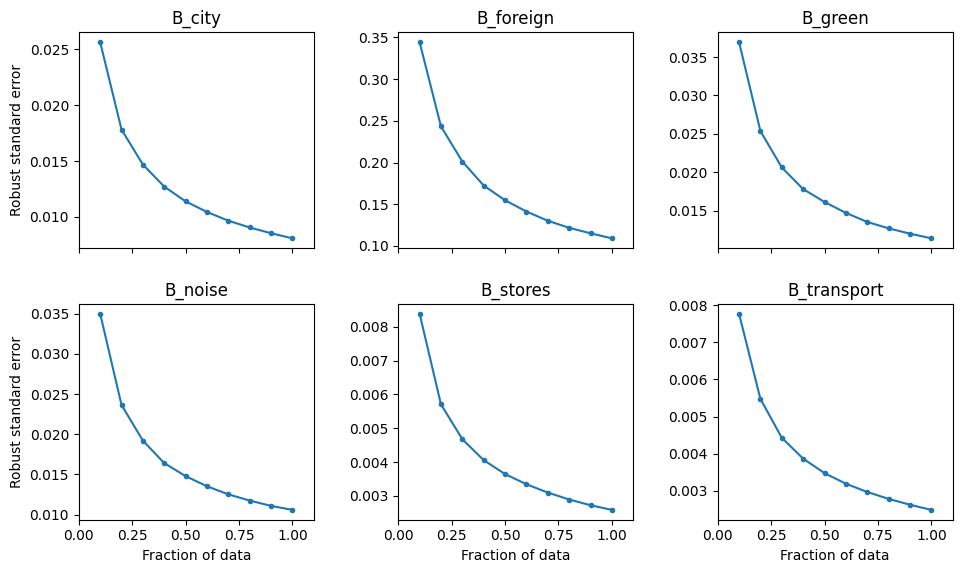

In [416]:
# Let's plot the standard errors for each beta as a function of the fraction of data
fig, ax = plt.subplots(2,3,figsize=(10, 6), sharex=True)
fig.tight_layout(pad=3.0)
ax = ax.flatten()   
for i, beta in enumerate(beta_hat_MNL.index):
    # Plot the standard errors for each beta
    ax[i].plot(frac, df_std_err_frac.loc[beta].values, marker='.')
    ax[i].set_title(beta)
    ax[i].set_xlim(0, 1.1)
    if i >=3:
        ax[i].set_xlabel('Fraction of data')

ax[0].set_ylabel('Robust standard error')   
ax[3].set_ylabel('Robust standard error')   
plt.show()

### `Exercise 3: Standard errors`
Standard errors tell us how different the ùõΩ¬†ÃÇs would have been if we had estimated the same choice model on a new sample of the same size. In the plot above, the standard errors are computed based on the second order derivatives of the log-likelihood function. Therefore, these are called "analytical standard errors". Another way to obtain the standard errors, is through a **sampling** approach (aka bootstrapping). This entails estimating the model numerous times based on a random sample of the data.
<br>

`A` Use sampling to investigate the standard errors of the estimates. Estimate the linear-additive RUM-MNL model hundred times, using a small fraction of 10%. 
<br>
Hint: to ensure that you draw different samples each time, you can use the `sample()` function, set the `random_state` parameter to a different value each time, e.g. `random_state=1`, `random_state=2`, etc.

`B` Can you reproduce the magnitudes of the standard errors in the plot above?<br>

`C` Suppose that you would use a larger sampling fraction (e.g. 99%). Can you still reproduce the magnitudes of the standard errors in the plot above?<br>

In [417]:
# Your code and answers
# Define the fractions to sample
fraction = 0.1

# Create a pandas dataframe to store the results
df_est_frac = pd.DataFrame(index=beta_hat_MNL.index, columns=range(100))

# Loop over the fractions
for i in range(100):
    
    # Randomly sample frac% of the data
    df_frac2 = df.sample(frac=fraction, random_state=i)  # Using random_state for reproducibility

    # Create a new Biogeme database with the sampled data
    biodata_frac = db.Database('Neighbourhood_choice_data_sampled', df_frac2)


    # Give a name to the model    
    model_name = f'Linear-additive RUM-MNL with 10% of the data sampled {i} times'

    # Redefine the utility functions
    V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
    V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
    V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

    # Estimate the model
    results_MNL_frac = estimate_mnl(V1,V2,V3,CHOICE,biodata_frac,model_name)

    # Get the model parameters in a pandas table and  print it
    beta_hat_MNL_frac   = results_MNL_frac.get_estimated_parameters()
    df_est_frac.loc[:,i] = beta_hat_MNL_frac['Value']
    
# Show the results
df_est_frac

0         1         2         3         4         5   \
B_city       -0.14761 -0.216949 -0.166976 -0.156078 -0.144033 -0.200983   
B_foreign   -1.153646 -0.953664 -1.313708 -1.657961 -2.048158 -0.683847   
B_green       0.38497  0.438576  0.425966  0.426598  0.423615  0.436445   
B_noise     -0.409013 -0.474816 -0.476636 -0.446887 -0.452391 -0.374112   
B_stores    -0.025678 -0.022002 -0.042015 -0.048304 -0.028853 -0.044525   
B_transport -0.090453 -0.081875 -0.088799 -0.067303 -0.081204 -0.076228   

                   6         7         8         9         10        11  \
B_city      -0.211644 -0.173472 -0.112851  -0.18217 -0.159851 -0.192737   
B_foreign   -1.291302 -0.823947 -1.314304 -0.969662 -0.574208 -1.059524   
B_green      0.407647  0.384992  0.396815  0.438068  0.443079  0.428242   
B_noise     -0.497207 -0.454903 -0.393791 -0.375188 -0.461315 -0.479688   
B_stores    -0.028672 -0.026242 -0.049163 -0.037227  -0.02838 -0.046205   
B_transport -0.084445 -0.075639  -0.06773 -0.088318 -0.069383 -0.078917   

                   12        13        14        15        16        17  \
B_city      -0.170715 -0.183146 -0.176524 -0.155325 -0.160453 -0.214235   
B_foreign   -1.685747 -1.364083  -1.03117  -1.36498 -1.362896 -0.735684   
B_green      0.416105  0.420668  0.440117  0.450974  0.404766  0.449963   
B_noise     -0.465031 -0.407773 -0.430092 -0.469283 -0.396798 -0.430333   
B_stores    -0.022946 -0.033606 -0.034715 -0.044856 -0.035627 -0.059024   
B_transport  -0.07934 -0.073857 -0.073068 -0.073428 -0.067964 -0.076336   

                   18        19        20        21        22        23  \
B_city      -0.129916 -0.174829 -0.187108 -0.193829 -0.186384 -0.204408   
B_foreign   -0.735997  -1.26787 -1.193694 -1.510578 -1.426011 -0.699469   
B_green      0.437895  0.422303  0.352284  0.438731  0.395985  0.401296   
B_noise     -0.389541  -0.42048 -0.446737 -0.448795 -0.454807 -0.450148   
B_stores    -0.032299  -0.04116 -0.045807 -0.019001 -0.039691 -0.043767   
B_transport -0.079198 -0.062926 -0.080718 -0.081961 -0.074099 -0.082685   

                   24        25        26        27        28        29  \
B_city      -0.136409 -0.174424 -0.173196 -0.145312 -0.215371 -0.130642   
B_foreign   -1.282899 -0.862763 -1.151902 -1.036224 -1.152929 -1.454872   
B_green      0.383855  0.422698  0.341197  0.422476  0.444122   0.44336   
B_noise     -0.478873  -0.42651  -0.46707 -0.456097 -0.440453 -0.472986   
B_stores     -0.02721 -0.038957 -0.032599 -0.025558 -0.036495 -0.032114   
B_transport -0.076705 -0.064886 -0.069821 -0.069288 -0.089298 -0.066606   

                   30        31        32        33        34        35  \
B_city      -0.157801 -0.237766 -0.179332 -0.175676  -0.13777 -0.155794   
B_foreign   -1.270862 -0.982873 -1.368405   -1.9082  -1.23404 -1.222826   
B_green      0.379081  0.410571  0.378991  0.439882  0.442171   0.43727   
B_noise     -0.437803 -0.440655 -0.410491  -0.45009 -0.437687 -0.402544   
B_stores    -0.035725 -0.026563 -0.029918 -0.046981 -0.053853 -0.047315   
B_transport -0.081021 -0.089062 -0.068029 -0.063647  -0.07654  -0.07691   

                   36        37        38        39        40        41  \
B_city      -0.121311 -0.205294  -0.21041 -0.143924 -0.185454 -0.122747   
B_foreign   -1.220975 -1.676771 -0.773177 -1.157337 -1.752024 -1.022085   
B_green      0.460997  0.448086  0.446649  0.399348  0.372849  0.453644   
B_noise     -0.469875 -0.533037  -0.43179 -0.480579  -0.38249 -0.440753   
B_stores    -0.041825 -0.030872 -0.036732 -0.039744 -0.029009 -0.036029   
B_transport -0.067602 -0.073815 -0.077844 -0.083753 -0.074113 -0.081249   

                   42        43        44        45        46        47  \
B_city      -0.159117 -0.199651 -0.151631 -0.175911 -0.168617 -0.159983   
B_foreign   -0.648673 -1.230656 -1.792622 -0.957675 -1.403445  -0.69712   
B_green      0.451604  0.405615  0.447151  0.434154    0.4121  0.408619   
B_noise     -0.441522 -0.404719 -0.46

In [418]:
std_empirical = df_est_frac.T.std()
std_empirical

B_city         0.025205
B_foreign       0.34342
B_green        0.029244
B_noise        0.030226
B_stores       0.007843
B_transport    0.007318
dtype: object

In [419]:
std_analytical = df_std_err_frac[fraction]
std_comparison = pd.DataFrame({'Empirical':std_empirical, 'Analytical':std_analytical, 'Ratio':std_analytical/std_empirical})
std_comparison

Empirical Analytical     Ratio
B_city       0.025205   0.025659  1.018033
B_foreign     0.34342   0.344377  1.002787
B_green      0.029244   0.036943  1.263281
B_noise      0.030226   0.034991  1.157641
B_stores     0.007843   0.008388  1.069437
B_transport  0.007318   0.007771  1.061844

In [420]:
# Your code and answers
# Define the fractions to sample
fraction = 0.99

# Create a pandas dataframe to store the results
df_est_frac = pd.DataFrame(index=beta_hat_MNL.index, columns=range(100))

# Loop over the fractions
for i in range(100):
    
    # Randomly sample frac% of the data
    df_frac2 = df.sample(frac=fraction, random_state=i)  # Using random_state for reproducibility

    # Create a new Biogeme database with the sampled data
    biodata_frac = db.Database('Neighbourhood_choice_data_sampled', df_frac2)


    # Give a name to the model    
    model_name = f'Linear-additive RUM-MNL with 10% of the data sampled {i} times'

    # Redefine the utility functions
    V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
    V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
    V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

    # Estimate the model
    results_MNL_frac = estimate_mnl(V1,V2,V3,CHOICE,biodata_frac,model_name)

    # Get the model parameters in a pandas table and  print it
    beta_hat_MNL_frac   = results_MNL_frac.get_estimated_parameters()
    df_est_frac.loc[:,i] = beta_hat_MNL_frac['Value']
    
# Show the results
df_est_frac

0         1         2         3         4         5   \
B_city      -0.168507 -0.166662 -0.167563 -0.166621 -0.166588 -0.167173   
B_foreign   -1.168583 -1.167462 -1.174066 -1.192383  -1.17587 -1.167729   
B_green      0.417079    0.4156  0.416141  0.415927  0.415615  0.417785   
B_noise     -0.438804 -0.439562 -0.439611 -0.438462 -0.435785 -0.438671   
B_stores    -0.034835 -0.033901  -0.03458 -0.034951 -0.034734 -0.034919   
B_transport   -0.0747 -0.074391 -0.074438 -0.074348 -0.074295 -0.074779   

                   6         7         8         9         10        11  \
B_city      -0.166444 -0.167075 -0.167743 -0.169596 -0.166173 -0.167895   
B_foreign   -1.176273 -1.197588 -1.170959 -1.191012 -1.186665 -1.181173   
B_green      0.416978  0.417175   0.41718  0.415762  0.415285  0.414758   
B_noise     -0.439077 -0.437778  -0.43799 -0.438745 -0.437702 -0.437576   
B_stores    -0.034766 -0.034593 -0.034184 -0.035167 -0.034025 -0.034429   
B_transport -0.073911 -0.074444 -0.074415 -0.074286 -0.074726 -0.074278   

                   12        13        14        15        16        17  \
B_city      -0.167789 -0.168411 -0.166709 -0.167229 -0.168871 -0.168542   
B_foreign   -1.188455 -1.177338 -1.178736 -1.161033 -1.170442 -1.177683   
B_green       0.41716  0.417363  0.415496  0.415978  0.414634  0.414912   
B_noise     -0.437561 -0.438798 -0.438712 -0.438944 -0.438079 -0.437811   
B_stores    -0.034032 -0.034676 -0.034789 -0.034871 -0.034288 -0.034528   
B_transport -0.074362 -0.075069 -0.074524 -0.074014 -0.074393 -0.074245   

                   18        19        20        21        22        23  \
B_city      -0.167681 -0.168466 -0.168045 -0.167997 -0.168237 -0.167824   
B_foreign   -1.188629  -1.16419 -1.187084 -1.181036 -1.157137 -1.187492   
B_green      0.415545  0.415557  0.416395  0.416582  0.417562  0.415431   
B_noise     -0.438939 -0.438075 -0.438654 -0.440485 -0.438882 -0.437234   
B_stores    -0.034349  -0.03447 -0.034733 -0.034673 -0.034571 -0.034542   
B_transport -0.074606  -0.07399 -0.074461 -0.074248 -0.074637 -0.074427   

                   24        25        26        27        28        29  \
B_city      -0.168733 -0.165397 -0.167722 -0.167576 -0.166506 -0.167445   
B_foreign   -1.152122 -1.175947 -1.179914 -1.185176 -1.172345 -1.178448   
B_green      0.415492  0.413812  0.415902     0.418  0.416088    0.4148   
B_noise     -0.437976 -0.436818 -0.438858 -0.437655 -0.438015 -0.436274   
B_stores    -0.034278 -0.034271 -0.034425 -0.034908 -0.034704 -0.034269   
B_transport  -0.07442 -0.074245  -0.07425  -0.07479 -0.074121 -0.074066   

                   30        31        32        33        34        35  \
B_city      -0.167241 -0.167896  -0.16736 -0.167433 -0.168296  -0.16798   
B_foreign   -1.172402 -1.186218 -1.170642 -1.169525 -1.166646 -1.178939   
B_green      0.415194  0.416048  0.415342  0.416767  0.417271  0.417433   
B_noise     -0.439174 -0.438468 -0.437838 -0.439037 -0.438722 -0.440988   
B_stores    -0.034449 -0.034323 -0.034634 -0.034495 -0.034536 -0.034371   
B_transport -0.074363 -0.074236 -0.074174 -0.074489 -0.074492 -0.074054   

                   36        37        38        39        40        41  \
B_city      -0.168387 -0.167555 -0.167394 -0.167856 -0.166562   -0.1674   
B_foreign   -1.170241 -1.175393 -1.191836  -1.17132 -1.174109 -1.192075   
B_green      0.417737  0.415432  0.414897  0.415278  0.413997  0.415444   
B_noise     -0.439577 -0.436782 -0.438123 -0.439629  -0.43566 -0.437045   
B_stores    -0.034645 -0.034494 -0.034254 -0.034821  -0.03462 -0.035217   
B_transport -0.074457 -0.074246 -0.074318 -0.074088 -0.074336 -0.074578   

                   42        43        44        45        46        47  \
B_city      -0.168582 -0.168948 -0.168193 -0.167825 -0.167828 -0.166803   
B_foreign   -1.181598 -1.168321 -1.188479   -1.1851 -1.191247 -1.198967   
B_green      0.415766  0.414317  0.415154  0.415856  0.415633  0.416245   
B_noise     -0.437917 -0.437117 -0.43

In [421]:
std_empirical = df_est_frac.T.std()
std_empirical

B_city           0.0008
B_foreign      0.011205
B_green        0.001097
B_noise        0.001137
B_stores       0.000273
B_transport    0.000245
dtype: object

In [426]:
std_analytical = df_std_err_frac[0.9]

In [ ]:

std_comparison = pd.DataFrame({'Empirical':std_empirical, 'Analytical':std_analytical, 'Ratio':std_analytical/std_empirical})
std_comparison

Empirical Analytical      Ratio
B_city         0.0008   0.008535   10.67359
B_foreign    0.011205   0.115095  10.272107
B_green      0.001097   0.012008  10.943353
B_noise      0.001137   0.011094   9.757795
B_stores     0.000273   0.002726     9.9821
B_transport  0.000245   0.002624  10.706464

A. - //
B. Yes //
C. No, 0.99 is not part of the dataset